In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read necessary csv files
df_airports = pd.read_csv("airports.csv")
df_airlines = pd.read_csv("airlines.csv")
df_flights = pd.read_csv("flights.csv")

C:\Users\Echo Lau\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Add a new column to check if the flights are operated
df_flights["OPERATED"] = df_flights["CANCELLED"].apply(lambda x: 1 if x == 0 else 0)

In [4]:
# Add a new column to check if the flights are delayed
df_flights["DELAY_RATE"] = df_flights["DEPARTURE_DELAY"].apply(lambda x: 1 if x > 0 else 0)

In [5]:
# Build a dataframe grouped by AIRLINE and ORIGIN_AIRPORT, and add number of flights, operated rate and delay rate on it
df_1 = df_flights.groupby(["AIRLINE", "ORIGIN_AIRPORT"]).agg(
    TOTAL_FLIGHT = ("FLIGHT_NUMBER", "count"),
    OPERATED = ("OPERATED", "mean"),
    DELAY_RATE = ("DELAY_RATE", "mean"))

In [6]:
# Build another dataframe with average delay minutes data, whcih only those flights have been delayed will be counted in
df_2 = df_flights.loc[df_flights["DELAY_RATE"] == 1].groupby(["AIRLINE", "ORIGIN_AIRPORT"]).agg({
    "DEPARTURE_DELAY": "mean"
})

In [7]:
# Reset the indexes to merge these two dataframes into one later on
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()

In [8]:
# Merge the dataframes into one
report = df_1.merge(df_2, on=["AIRLINE", "ORIGIN_AIRPORT"], how="inner")
print(report.head(10))

  AIRLINE ORIGIN_AIRPORT  TOTAL_FLIGHT  OPERATED  DELAY_RATE  DEPARTURE_DELAY
0      AA          10140           174  0.977011    0.247126        43.209302
1      AA          10257            80  1.000000    0.212500        27.764706
2      AA          10299            32  1.000000    0.250000         8.125000
3      AA          10397           917  0.992366    0.260632        22.991632
4      AA          10423           786  0.980916    0.226463        42.050562
5      AA          10529           264  0.992424    0.193182        18.882353
6      AA          10693           453  0.988962    0.245033        26.954955
7      AA          10713            62  1.000000    0.290323        37.666667
8      AA          10721          2414  0.986330    0.259735        28.937799
9      AA          10792           104  0.990385    0.230769        19.458333


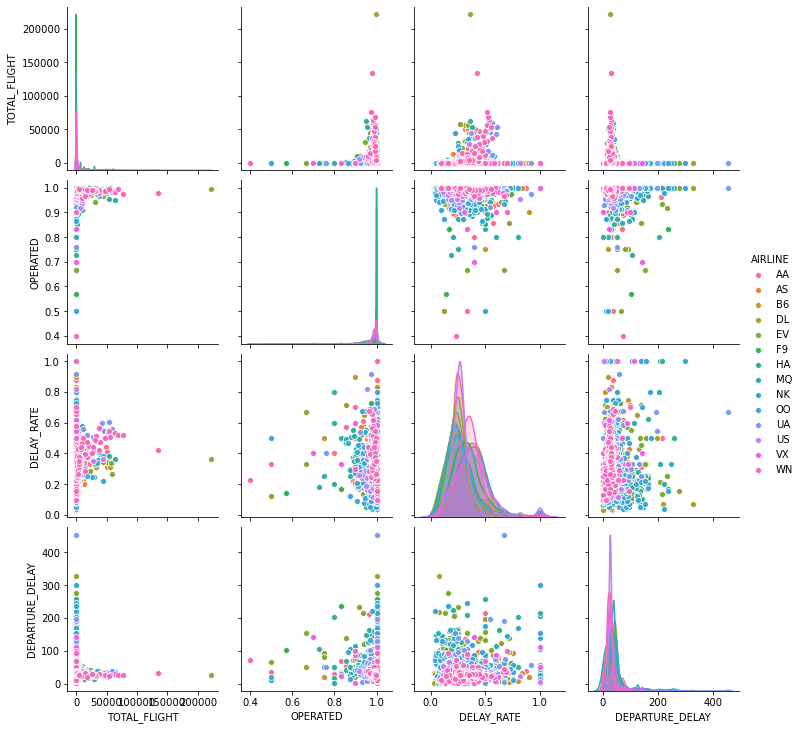

In [10]:
# Build a pairplot to visualize the multidimensional relationships among different airlines
sns.pairplot(report, hue = "AIRLINE", height = 2.5)

In [ ]:
# We can see most of the flights are operated, only a few of them are delayed 
# Obviously, AA has the highest number of flights in this dataset